- spmm-sparse-dense-diff
    - x축
        - 우측 행렬의 density
    - y축
        - 왼쪽 행렬 고정한 뒤, 우측 행렬 density 증가에 따른 곱셈 성능

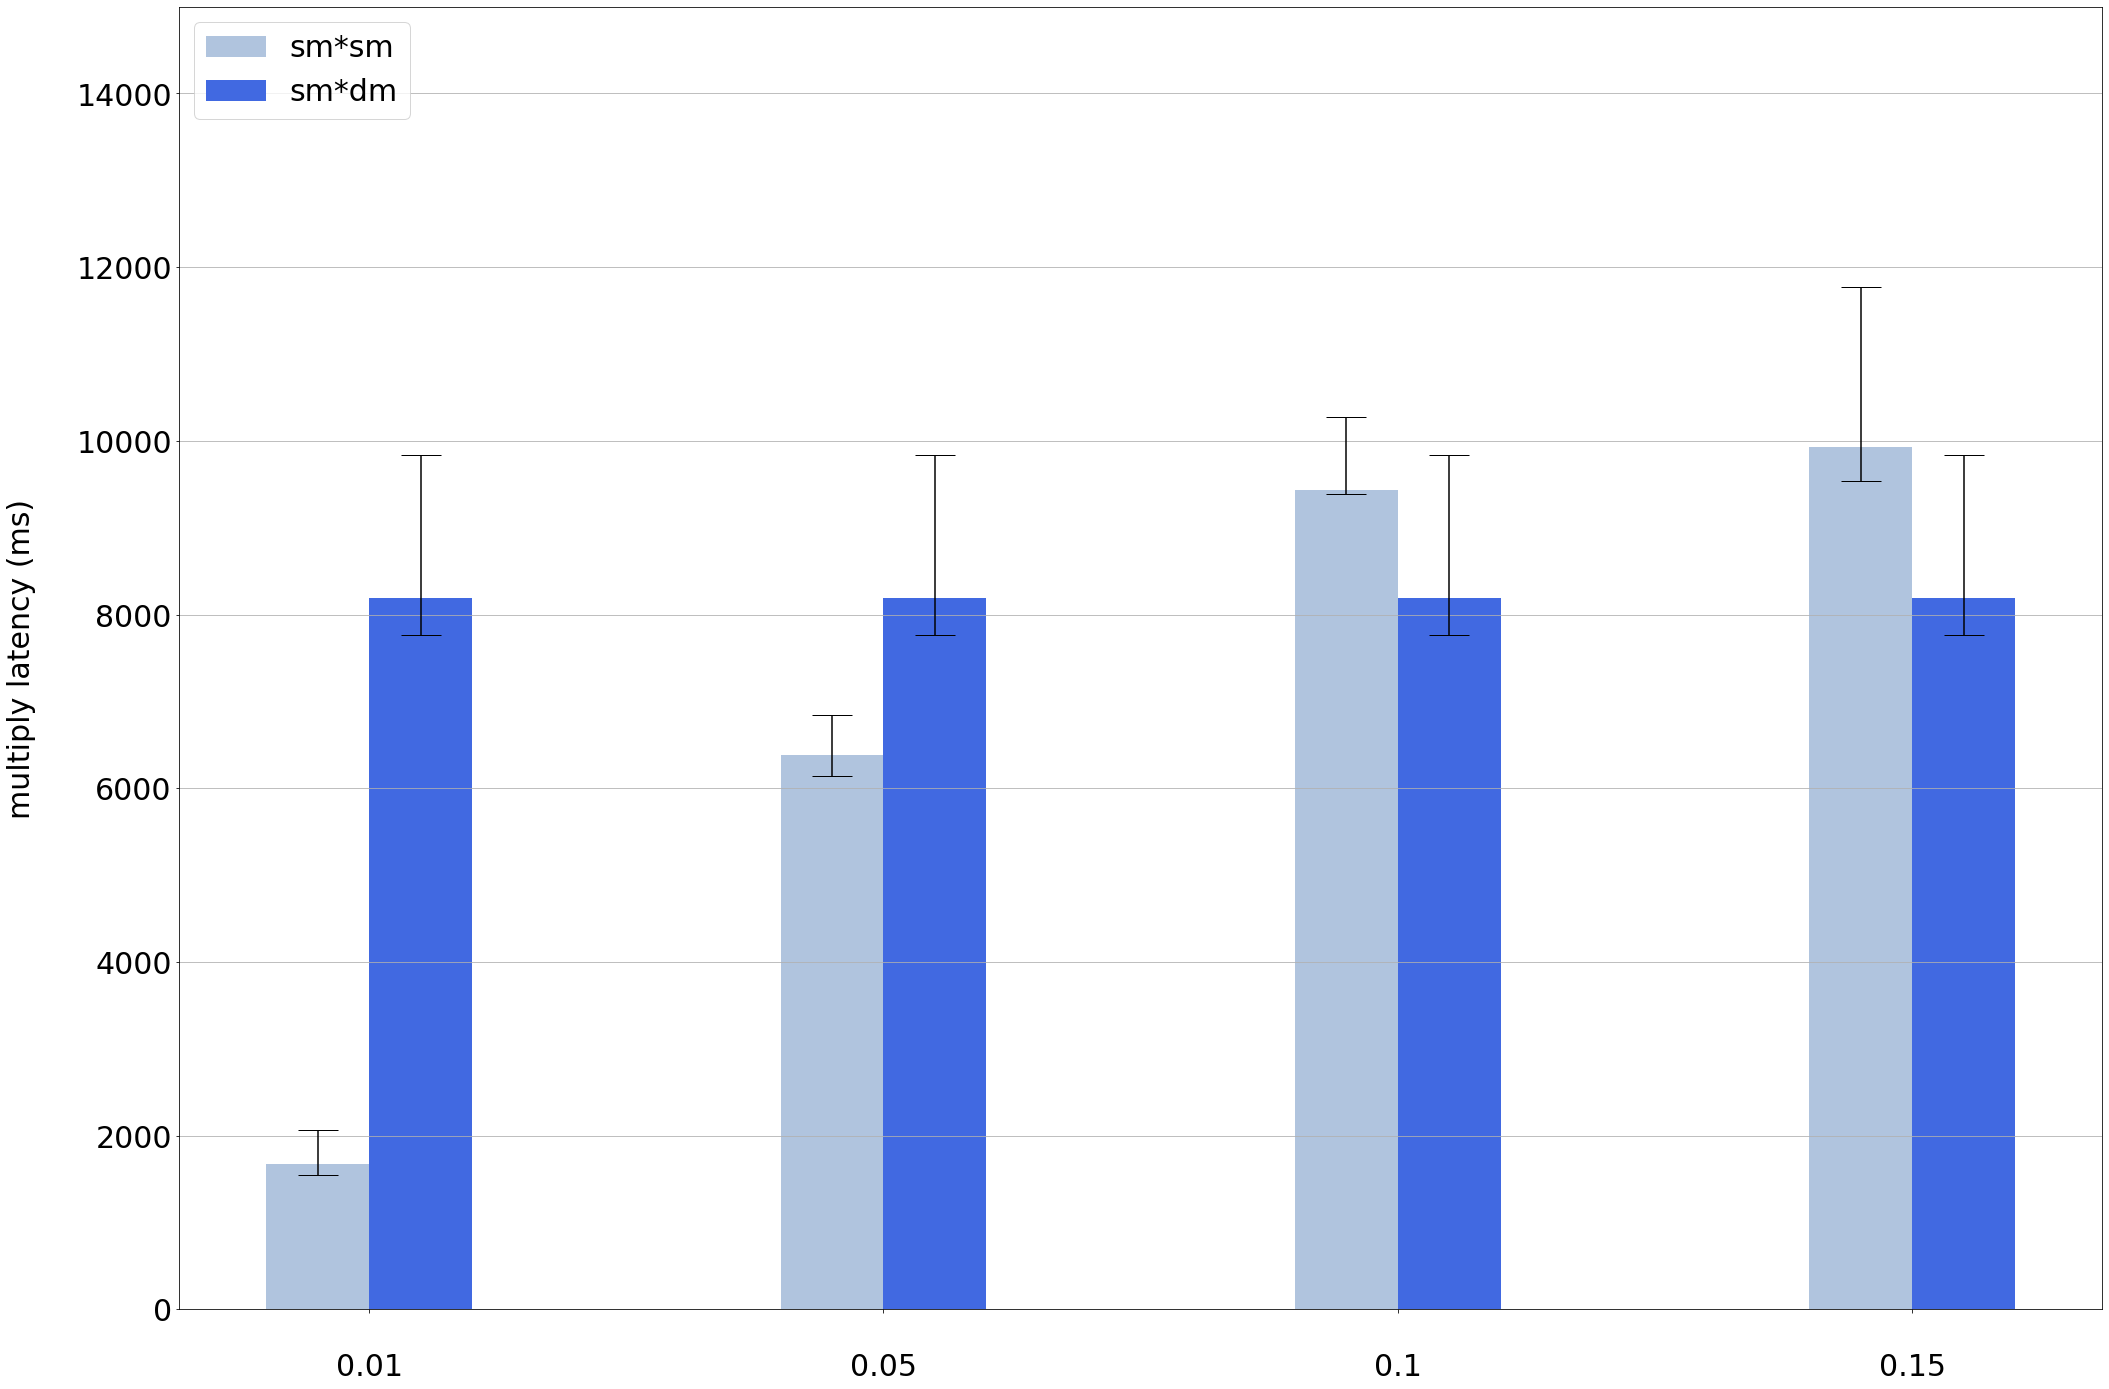

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정

r_sm_density = ["0.01", "0.05", "0.1", "0.15"]

################################# ax1 좌측 y ####################################################

# r_sm 의 density에 따른 sm * sm latency
sm_sm_latency = [1671.02, 6378.76, 9436.93, 9925.29]
sm_sm_min_latency = [1543, 6136, 9391, 9540]
sm_sm_max_latency = [2059, 6838, 10272, 11772]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_sm_latency':sm_sm_latency, 'sm_sm_min_latency': sm_sm_min_latency, 'sm_sm_max_latency': sm_sm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_sm_latency - df.sm_sm_min_latency
df['maxgap'] = df.sm_sm_max_latency - df.sm_sm_latency
yerr_sm_sm = df[['mingap', 'maxgap']].T.to_numpy()

# r_sm 의 density에 따른 sm * dm latency 
sm_dm_latency = [8184.82, 8184.82, 8184.82, 8184.82]
sm_dm_min_latency = [7761, 7761, 7761, 7761]
sm_dm_max_latency = [9836, 9836, 9836, 9836]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_dm_latency':sm_dm_latency, 'sm_dm_min_latency': sm_dm_min_latency, 'sm_dm_max_latency': sm_dm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_dm_latency - df.sm_dm_min_latency
df['maxgap'] = df.sm_dm_max_latency - df.sm_dm_latency
yerr_sm_dm = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

x = np.arange(len(r_sm_density)) # x축 인덱스
width = 0.2 # bar 넓이

fig, ax1 = plt.subplots(figsize=(30,20)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x - 0.1, sm_sm_latency, width, yerr=yerr_sm_sm, label='sm*sm', color='lightsteelblue', capsize=20)
bar2 = ax1.bar(x + 0.1, sm_dm_latency, width, yerr=yerr_sm_dm, label='sm*dm', color='royalblue', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(r_sm_density) # x축 label 이름
ax1.tick_params(axis='x',pad=40) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 15000])  # 좌측 y축 범위 설정
ax1.set_ylabel('multiply latency (ms)', labelpad=40) # ax1 ylabel 설정

#ax1.set_title('spmm sparse dense diff', pad=40) # ax1 title 설정
ax1.legend(loc="upper left") # 범례 표시

fig.tight_layout()
fig.savefig('./spmm-sparse-dense-diff.png')
plt.show()


